In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Download historical data
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Display the first few rows
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167610  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400543  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208  132079200


In [4]:
# Calculate features
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volatility'] = stock_data['Return'].rolling(window=20).std()

# Drop rows with NaN values
stock_data = stock_data.dropna()

# Define target variable: 1 if price goes up, 0 otherwise
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# Drop last row with NaN target
stock_data = stock_data[:-1]

# Features and target
features = stock_data[['Return', 'SMA_20', 'SMA_50', 'Volatility']]
target = stock_data['Target']



<ipython-input-4-4395f84231be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


SVM Accuracy: 0.5070422535211268
              precision    recall  f1-score   support

           0       0.47      0.34      0.40        67
           1       0.53      0.65      0.58        75

    accuracy                           0.51       142
   macro avg       0.50      0.50      0.49       142
weighted avg       0.50      0.51      0.50       142

Random Forest Accuracy: 0.4859154929577465
              precision    recall  f1-score   support

           0       0.46      0.46      0.46        67
           1       0.51      0.51      0.51        75

    accuracy                           0.49       142
   macro avg       0.48      0.48      0.48       142
weighted avg       0.49      0.49      0.49       142



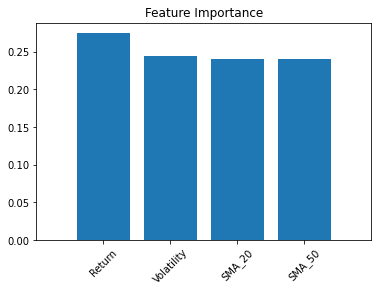

In [8]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()
